In [ ]:
#Implementing logistic regression for prediction.

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Preprocessing: Convert Diagnosis to binary (M=1, B=0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
X = data[['PC1', 'PC2']].values
y = data['Diagnosis'].values
ids = data['ID'].values

In [53]:
data = pd.read_csv("reduced_cancer_dataset.csv")

In [55]:
data

ID Diagnosis        PC1        PC2
0      842302         M   9.192837   1.948583
1      842517         M   2.387802  -3.768172
2    84300903         M   5.733896  -1.075174
3    84348301         M   7.122953  10.275589
4    84358402         M   3.935302  -1.948072
..        ...       ...        ...        ...
564    926424         M   6.439315  -3.576817
565    926682         M   3.793382  -3.584048
566    926954         M   1.256179  -1.902297
567    927241         M  10.374794   1.672010
568     92751         B  -5.475243  -0.670637

[569 rows x 4 columns]

In [29]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split (
    X, y, ids, test_size=0.2, random_state=42, stratify=y
)

In [35]:
# Training logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
# Making predictions
y_pred = model.predict(X_test)

In [41]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [43]:
# Saving predictions to a DataFrame
results = pd.DataFrame({
    'ID': ids_test,
    'True_Diagnosis': y_test,
    'Predicted_Diagnosis': y_pred
})
results.to_csv('logistic_predictions.csv', index=False)

<function matplotlib.pyplot.close(fig=None)>

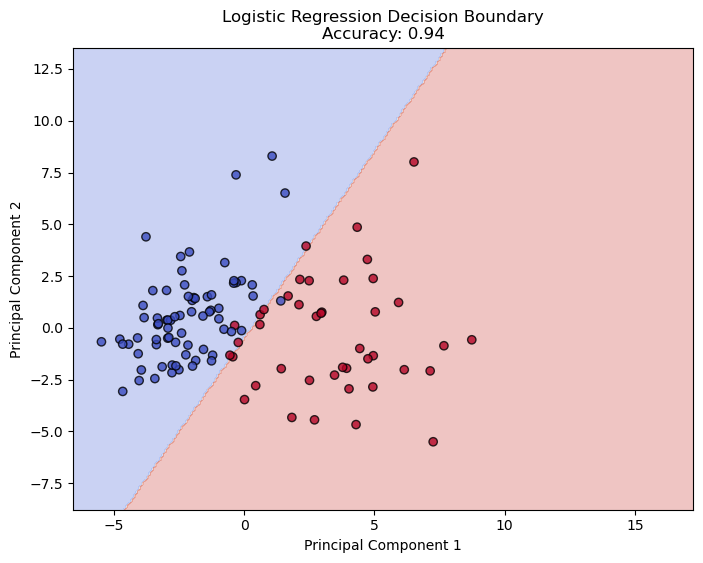

In [47]:
# Visualizing the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Logistic Regression Decision Boundary\nAccuracy: {accuracy:.2f}')
plt.savefig('logistic_decision_boundary.png')
plt.close

In [49]:
# Printing evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Logistic Regression Performance:
Accuracy: 0.9386
Precision: 0.9730
Recall: 0.8571
F1-Score: 0.9114


In [51]:
# Saving predictions as an artifact
with open('logistic_predictions.csv', 'r') as f:
    predictions_csv_content = f.read()